In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [14]:
def load_and_explore_data(file_path):
    data = pd.read_csv(file_path)
    print(data.info())
    print("First few rows of the dataset:")
    display(data.head())
  
    # Distribution of labels
    plot_label_distribution(data)
    
    # Visualize the length of text samples
    visualize_text_length(data)
    
    # Generate word cloud for each label
    generate_word_clouds(data)

    return data

In [15]:
def plot_label_distribution(data):
    f, ax = plt.subplots(figsize=(12, 4))
    sns.despine()
    ax = sns.countplot(data=data, x="label")
    abs_values = data['label'].value_counts().values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    ax.set_title("Distribution of dataset labels")


In [16]:
def visualize_text_length(data):
    data['text_length'] = data['text'].apply(len)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='text_length', bins=30, kde=True, color='skyblue')
    plt.title('Distribution of Text Length')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

In [17]:
def generate_word_clouds(data):
    labels = data['label'].unique()
    for label in labels:
        subset = data[data['label'] == label]
        text = ' '.join(subset['text'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for {label}')
        plt.axis('off')
        plt.show()

In [18]:
def dataset_creation(data1, data2, data3):
    #This function creates the final dataset by concatenating and preprocessing input datasets. 
    data2 = data2[~((data2['label'] == 0) & ~(data2['source'].isin(['persuade_corpus', 'train_essays'])))]
    data2.reset_index(drop=True, inplace=True)
    final_dataset = pd.concat([data1, data2, data3], ignore_index=True)
    #Removing unnecessary columns
    columns_to_remove = ['prompt_id', 'source', 'prompt', 'fold']
    final_dataset = final_dataset.drop(columns=columns_to_remove)
    final_dataset.drop(columns=['id'], inplace=True, errors='ignore')
    new_ids = range(1, len(final_dataset) + 1)
    final_dataset['id'] = new_ids

    # Check for missing values
    missing_values = final_dataset.isnull().sum()
    if missing_values.sum() > 0:
        print(f" There are missing values in the dataset. Please handle them.")
        print("Missing Values:")
        print(missing_values)
    else:
        print("No missing values")
        
    return final_dataset

In [19]:

def filter_and_save_final_dataset(final_dataset):
    '''
    This function filter the dataset to handle data imbalances
    and save the dataset to a CSV file.
    '''
    human_written_data = final_dataset[(final_dataset['label'] == 0)]
    num_samples_to_remove = len(human_written_data) - 15417
    if num_samples_to_remove > 0:
        final_dataset = final_dataset.drop(human_written_data.head(num_samples_to_remove).index)
    label_counts = final_dataset['label'].value_counts()
    ai_generated_count = label_counts[1]
    human_written_count = label_counts[0]
    print("AI-generated labels:", ai_generated_count)
    print("Human-written labels:", human_written_count)
    final_dataset.to_csv('final_dataset.csv', index=False)
    plot_label_distribution(final_dataset)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   label      1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB
None
First few rows of the dataset:


,id,prompt_id,text,label
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


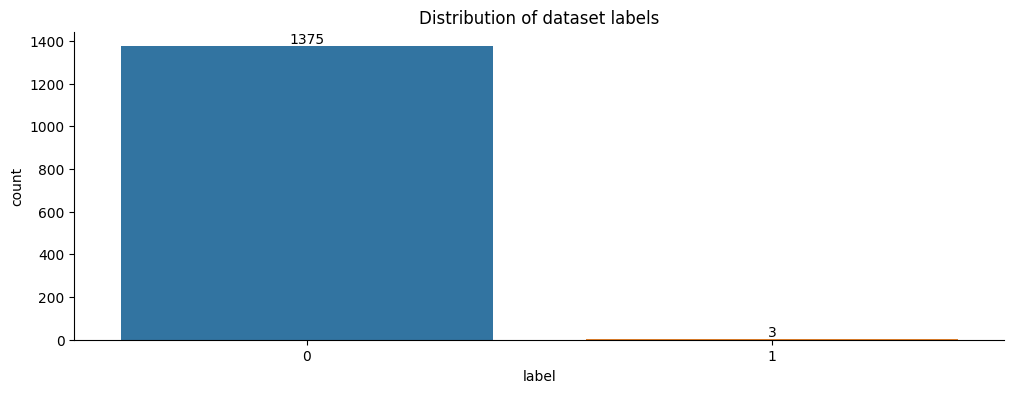

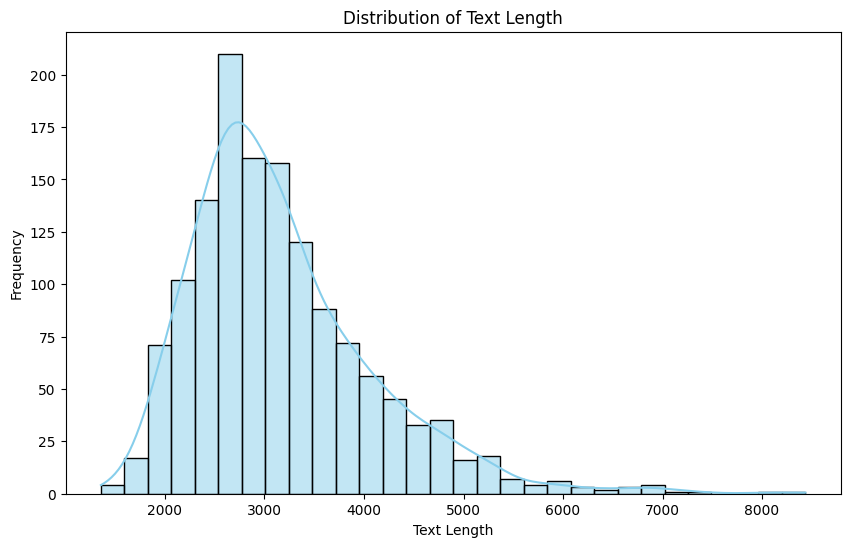

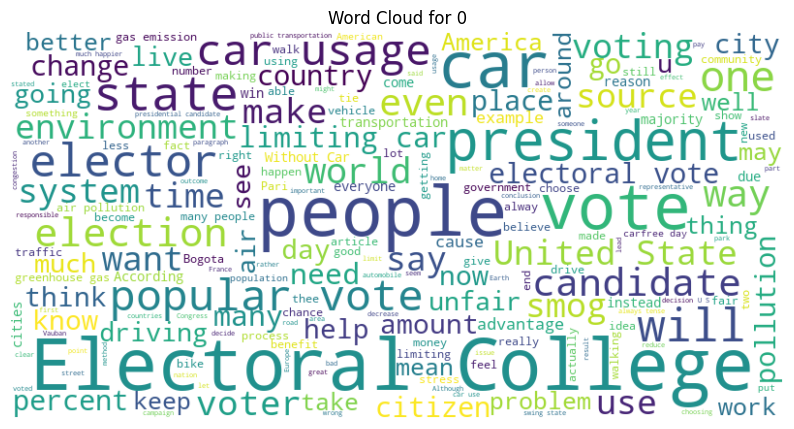

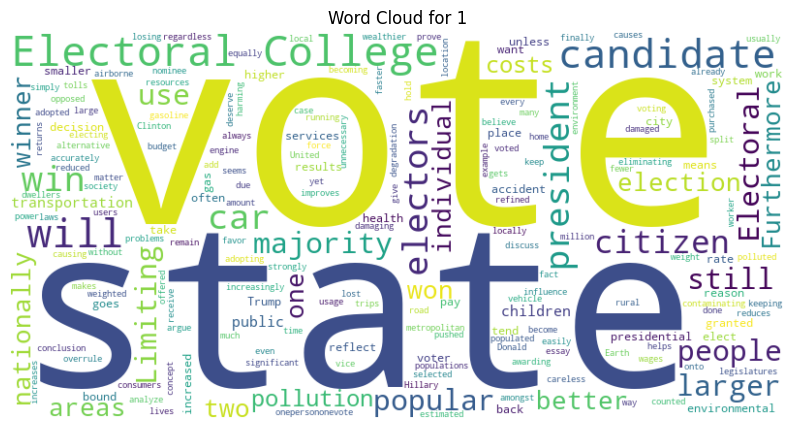

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44206 entries, 0 to 44205
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      44206 non-null  object
 1   text    44206 non-null  object
 2   label   44206 non-null  int64 
 3   source  44206 non-null  object
 4   prompt  12911 non-null  object
 5   fold    44206 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 2.0+ MB
None
First few rows of the dataset:


,id,text,label,source,prompt,fold
0,E897534557AF,"In recent years, technology has had a profoun...",1,mistral7binstruct_v2,\nTask: Write an essay discussing the positive...,1
1,DFBA34FFE11D,Should students participate in an extracurricu...,0,persuade_corpus,NaN,2
2,af37ecf5,The electoral college is a symbol of mockery a...,0,train_essays,NaN,5
3,5EC2696BAD78,This is why I think the principle should allow...,0,persuade_corpus,NaN,8
4,llama_70b_v1843,I strongly believe that meditation and mindful...,1,llama_70b_v1,Some schools have implemented meditation and m...,0


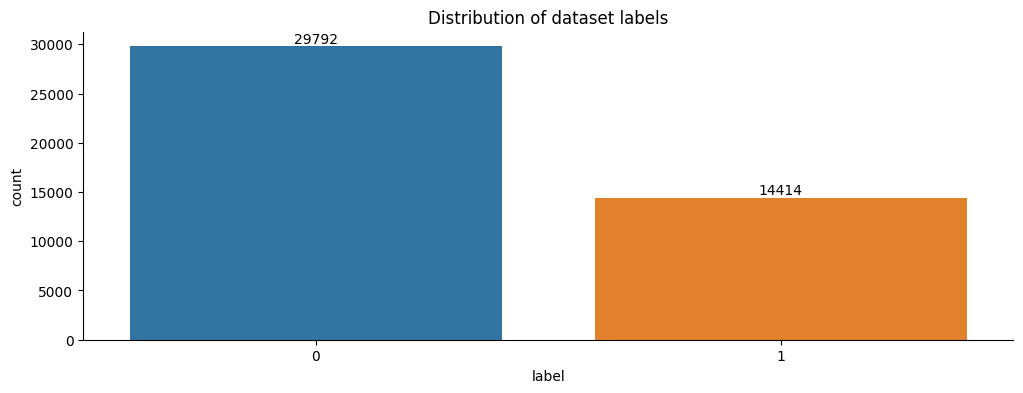

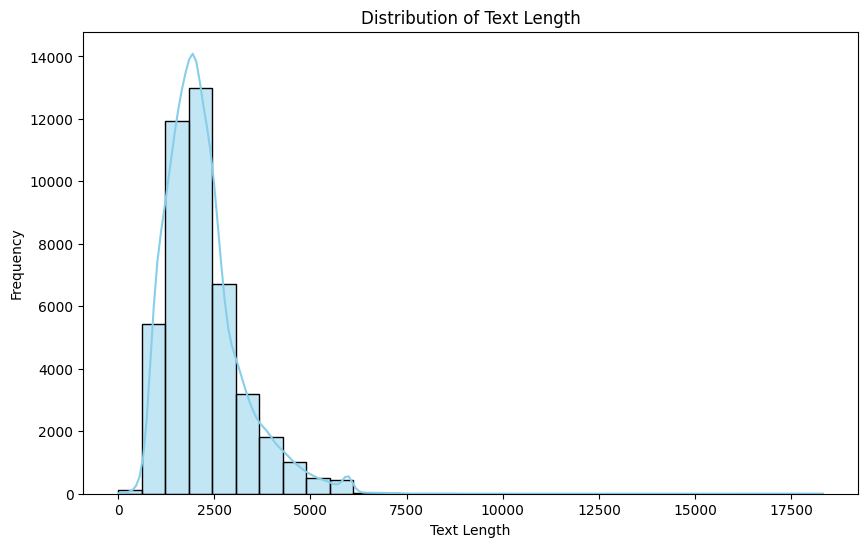

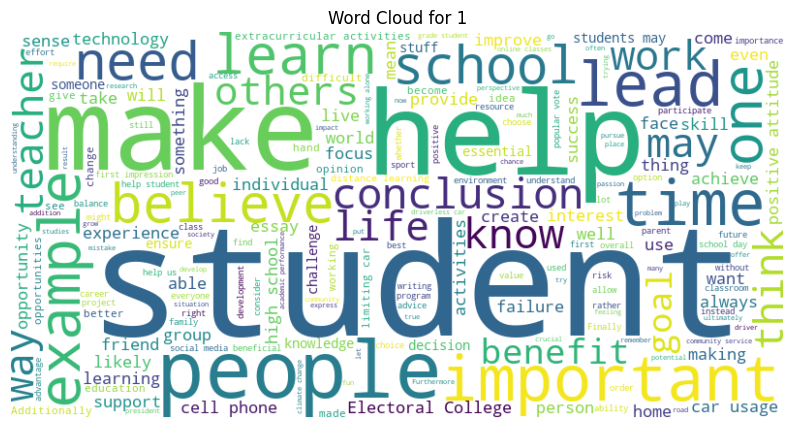

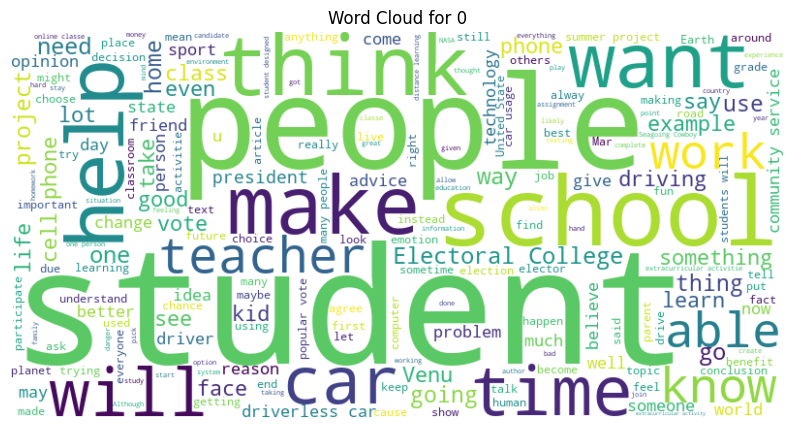

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2000 non-null   object
 1   id      2000 non-null   int64 
 2   label   2000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 47.0+ KB
None
First few rows of the dataset:


,text,id,label
0,I make it a point to never make the first move...,1,1
1,By Mark Dow The opinions expressed are his own...,2,1
2,Less than a tenth of companies that have been ...,3,1
3,One of Obamacare's biggest selling points was ...,4,1
4,"Mar 11, 2018 - Whooping cough is a respiratory...",5,1


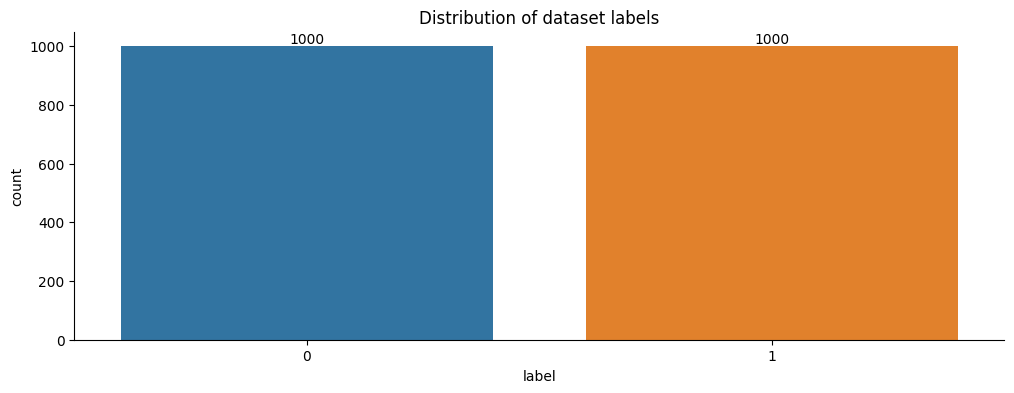

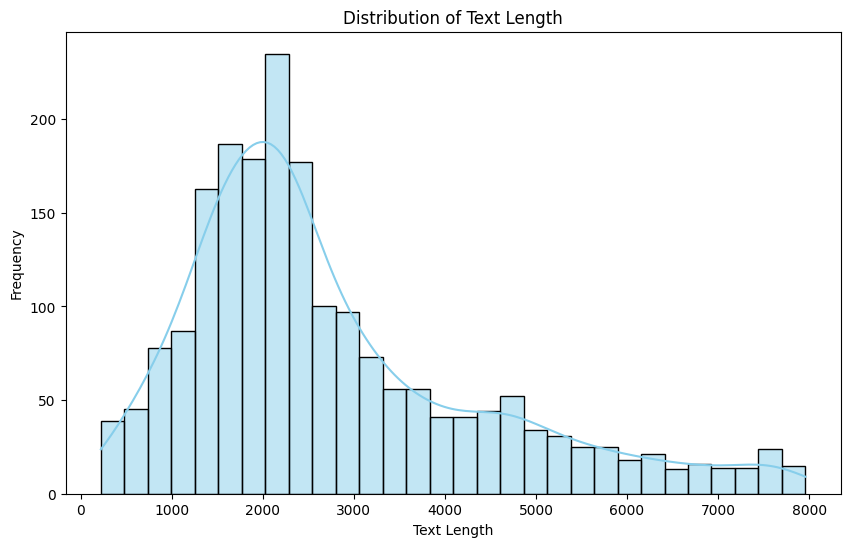

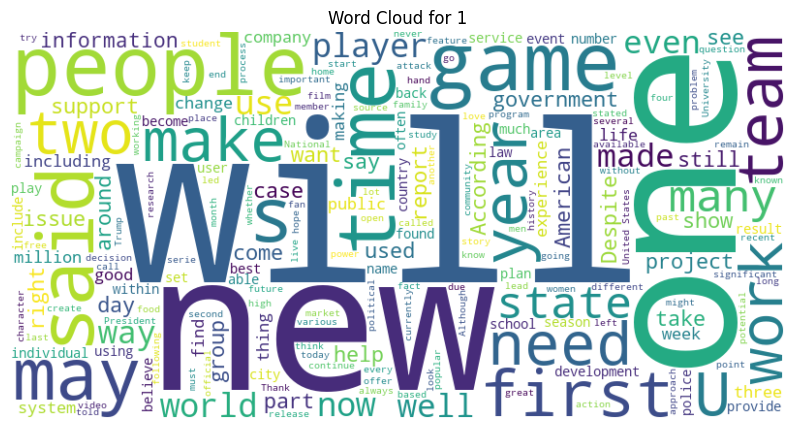

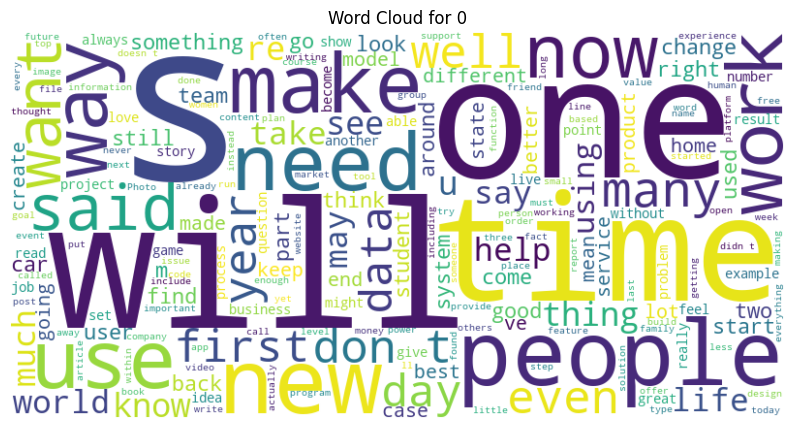

No missing values
AI-generated labels: 15417
Human-written labels: 15417


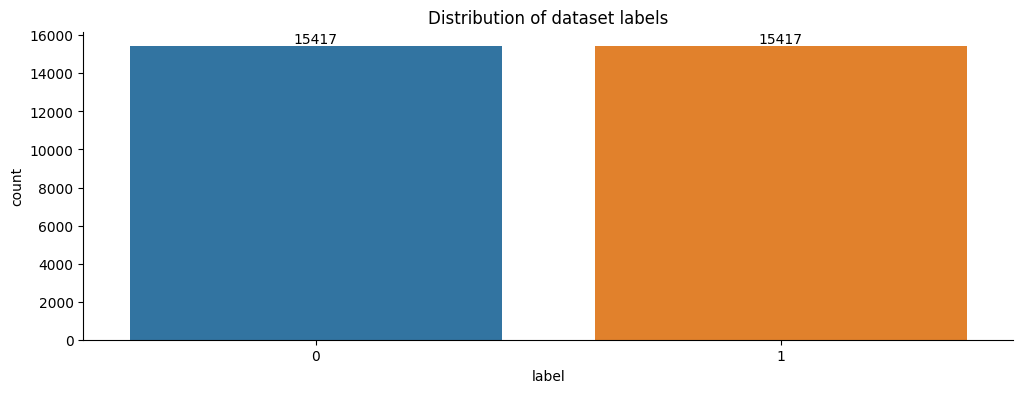

In [20]:
if __name__ == "__main__":
    data1 = load_and_explore_data("train_essays.csv")
    data2 = load_and_explore_data("train_drcat_04.csv")
    data3 = load_and_explore_data("benchmark_dataset.csv")
    final_dataset = dataset_creation(data1, data2, data3)
    filter_and_save_final_dataset(final_dataset)